# 准确性检验

In [69]:
import pandas as pd
from plotnine import *
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [7]:
df = pd.read_excel("../../datasets/100例受试对象的金标准诊断和两种诊断实验结果.xlsx")
df['is_patient'] = df['诊断结果'].apply(lambda x: 1 if x == "病人" else 0)
df['test_1'] = df['检测1']
df['test_2'] = df['检测2']
df.head()

,受试对象,诊断结果,检测1,检测2
0,1,病人,112.7,124.0
1,2,病人,104.0,135.8
2,3,病人,126.7,122.7
3,4,病人,123.3,158.4
4,5,病人,120.5,141.2


In [50]:
positive_num = sum(df['is_patient'] == 1)
negative_num = sum(df['is_patient'] == 0)
df['test_1_tpr'] = test1_tpr = df['test_1'].apply(
    lambda x: df[(df['test_1'] >= x)&(df['is_patient'] == 1)].shape[0] / positive_num
    )
df['test_1_fpr'] = test1_fpr = df['test_1'].apply(
    lambda x: df[(df['test_1'] >= x)&(df['is_patient'] == 0)].shape[0] / negative_num
    )
df['test_2_tpr'] = test2_tpr = df['test_2'].apply(
    lambda x: df[(df['test_2'] >= x)&(df['is_patient'] == 1)].shape[0] / positive_num
    )
df['test_2_fpr'] = test2_fpr = df['test_2'].apply(
    lambda x: df[(df['test_2'] >= x)&(df['is_patient'] == 0)].shape[0] / negative_num
    )
test_df = pd.DataFrame(
    {
        "test_tpr": test1_tpr.tolist() + test2_tpr.tolist(),
        "test_fpr": test1_fpr.tolist() + test2_fpr.tolist(),
        "test_name": ["test_1"] * test1_fpr.shape[0] + ["test_2"] * test2_fpr.shape[0]
    }
)


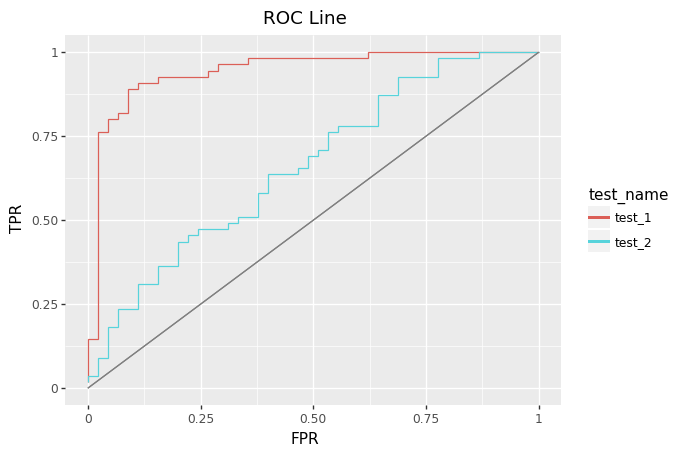

<ggplot: (152511805483)>

In [58]:
ggplot(test_df.sort_values(["test_tpr"]), aes(x = "test_fpr", y = "test_tpr", group="test_name")) + \
    geom_step(aes(color="test_name")) + \
    stat_function(fun = lambda x: x, color="grey") + \
    ylab("TPR") + xlab("FPR") + ggtitle("ROC Line")

In [70]:
fpr, tpr, thresholds = roc_curve(df['is_patient'], (df['test_1'] - df['test_1'].min()) / (df['test_1'].max() - df['test_1'].mean()))
auc(fpr, tpr), roc_auc_score(df['is_patient'], (df['test_1'] - df['test_1'].min()) / (df['test_1'].max() - df['test_1'].mean()))

(0.9446464646464647, 0.9446464646464647)

In [71]:
fpr, tpr, thresholds = roc_curve(df['is_patient'], (df['test_2'] - df['test_2'].min()) / (df['test_2'].max() - df['test_2'].mean()))
auc(fpr, tpr), roc_auc_score(df['is_patient'], (df['test_2'] - df['test_2'].min()) / (df['test_2'].max() - df['test_2'].mean()))

(0.6628282828282828, 0.6628282828282828)